# Section 3.4 — Hypothesis testing using analytical approximations

This notebook contains the code examples from [Section 3.4 Hypothesis testing using analytical approximations]() of the **No Bullshit Guide to Statistics**.

#### Notebook setup

In [1]:
# Ensure required Python modules are installed
%pip install --quiet numpy scipy seaborn pandas ministats

Note: you may need to restart the kernel to use updated packages.


In [2]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={"font.family": "serif",
        "font.serif": ["Palatino", "DejaVu Serif", "serif"],
        "figure.figsize": (5, 1.6)},
)
%config InlineBackend.figure_format = 'retina'

<Figure size 640x480 with 0 Axes>

In [4]:
# simple float __repr__
np.set_printoptions(legacy='1.25')

# set random seed for repeatability
np.random.seed(42)

In [5]:
# Download datasets/ directory if necessary
from ministats import ensure_datasets
ensure_datasets()

$\def\stderr#1{\mathbf{se}_{#1}}$
$\def\stderrhat#1{\hat{\mathbf{se}}_{#1}}$
$\newcommand{\Mean}{\textbf{Mean}}$
$\newcommand{\Var}{\textbf{Var}}$
$\newcommand{\Std}{\textbf{Std}}$
$\newcommand{\Freq}{\textbf{Freq}}$
$\newcommand{\RelFreq}{\textbf{RelFreq}}$
$\newcommand{\DMeans}{\textbf{DMeans}}$
$\newcommand{\Prop}{\textbf{Prop}}$
$\newcommand{\DProps}{\textbf{DProps}}$

$$
\newcommand{\CI}[1]{\textbf{CI}_{#1}}
\newcommand{\CIL}[1]{\textbf{L}_{#1}}
\newcommand{\CIU}[1]{\textbf{U}_{#1}}
\newcommand{\ci}[1]{\textbf{ci}_{#1}}
\newcommand{\cil}[1]{\textbf{l}_{#1}}
\newcommand{\ciu}[1]{\textbf{u}_{#1}}
$$


(this cell contains the macro definitions like $\stderr{\overline{\mathbf{x}}}$, $\stderrhat{}$, $\Mean$, ...)

## Definitions

### Context 
- test statistic

- sampling distribution of the test statistic

- pivotal transformation

- reference distributions

In [6]:
def mean(sample):
    return sum(sample) / len(sample)

def var(sample):
    xbar = mean(sample)
    sumsqdevs = sum([(xi-xbar)**2 for xi in sample])
    return sumsqdevs / (len(sample)-1)

def std(sample):
    s2 = var(sample)
    return np.sqrt(s2)

### Analytical approximations

In [7]:
# theoretical model for the kombucha volumes
muX0 = 1000   # population mean (expected kombucha volume)
sigmaX0 = 10  # population standard deviation

In [8]:
sample = [1005.19,  987.31, 1002.4,  991.96,
          1000.17, 1003.94, 1012.79]
n = len(sample)  # sample size

#### Normal approximation to the sample mean

In [9]:
from scipy.stats import norm

sigmaX0 = 10  # population standard deviation
se = sigmaX0 / np.sqrt(n)
rvNXbar_0 = norm(loc=muX0, scale=se)

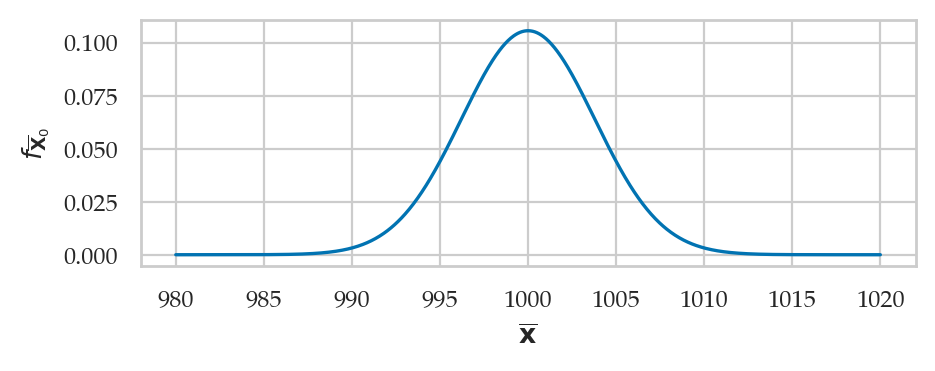

In [10]:
from ministats import plot_pdf
ax = plot_pdf(rvNXbar_0, xlims=[980, 1020])
ax.set_ylabel(r"$f_{\overline{\mathbf{X}}_0}$")
ax.set_xlabel(r"$\overline{\mathbf{x}}$");

#### Student's $t$-approximation to the sample mean

In [11]:
from scipy.stats import t as tdist

muX0 = 1000      # population mean (expected kombucha volume)
sigmaX0 = 10     # population standard deviation
n = len(sample)  # sample size
sehat = std(sample) / np.sqrt(n)
rvTXbar_0 = tdist(df=n-1, loc=muX0, scale=sehat)

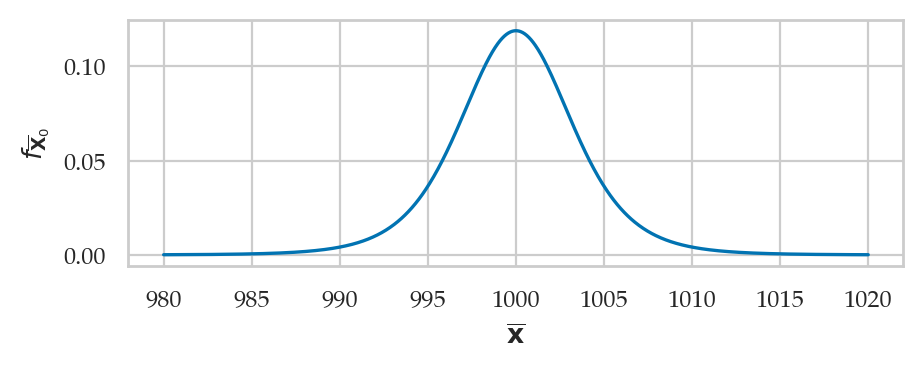

In [12]:
ax = plot_pdf(rvTXbar_0, xlims=[980, 1020])
ax.set_ylabel(r"$f_{\overline{\mathbf{X}}_0}$")
ax.set_xlabel(r"$\overline{\mathbf{x}}$");

#### The $\chi^2$-approximation to the sample variance

In [13]:
from scipy.stats import chi2
sigmaX0 = 10     # population standard deviation
n = len(sample)  # sample size
scale = sigmaX0**2 / (n-1)
rvQS2_0 = chi2(df=n-1, scale=scale)

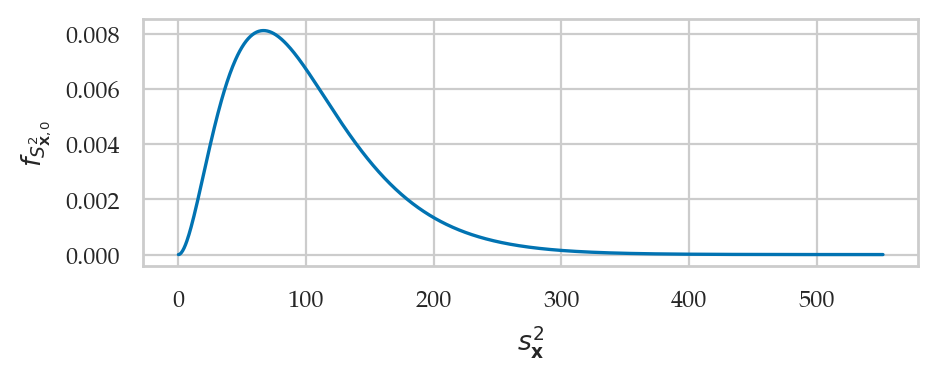

In [14]:
ax = plot_pdf(rvQS2_0, rv_name="Q")
ax.set_ylabel(r"$f_{S^2_{\mathbf{X},0}}$")
ax.set_xlabel(r"$s^2_{\mathbf{x}}$");

### Calculating $p$-values


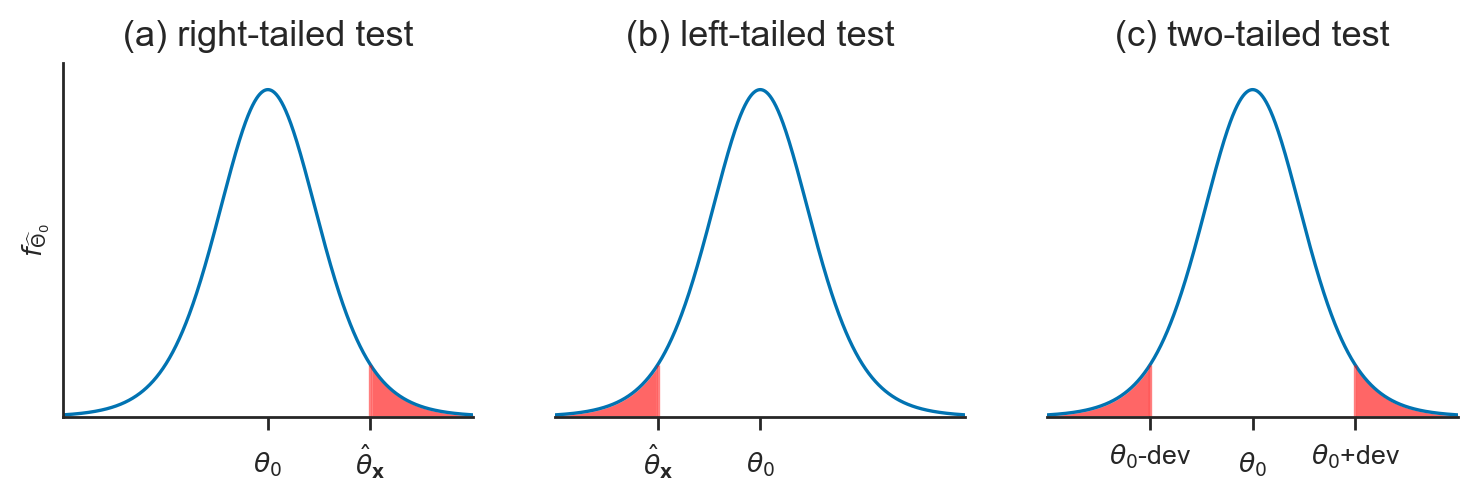

In [15]:
from ministats.book.figures import plot_panel_pvalue_theta0_tails

fig = plot_panel_pvalue_theta0_tails();

### Pivotal transformations

### Calculating $p$-values for standardized test statistics


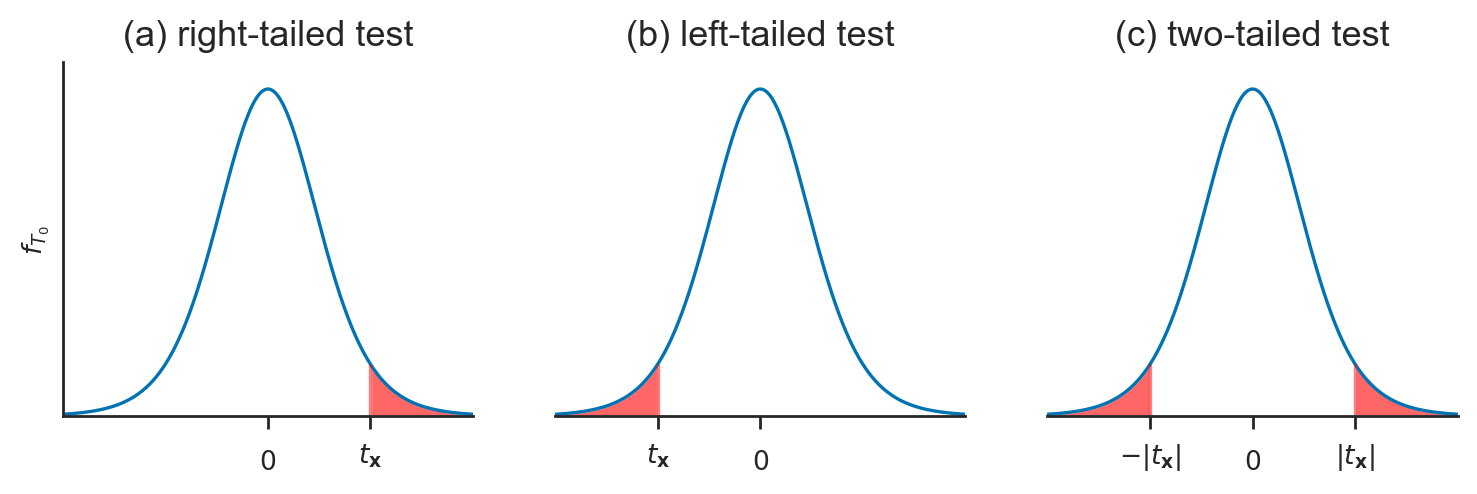

In [16]:
from ministats.book.figures import plot_panel_pvalue_t_tails

fig = plot_panel_pvalue_t_tails();

## Test for the mean (known variance)

### Analytical approximation for the sample mean

If the theoretical distribution under the null is normally distributed $X_0 \sim \mathcal{N}(\mu_{X_0}, \sigma_{X_0})$,
then the central limit theorem tells us the sampling distribution of the mean
is described by the formula
  
$$
    \overline{\mathbf{X}}_0 \sim \mathcal{N}(\mu_{X_0}, \frac{\sigma_{X_0}}{\sqrt{n}}).
$$


#### Kombucha bottling process

We'll use the kombucha scenario for all the examples in this section.
Recall, the probability distirbution of the kombucha volume is described by
the theoretical model $K_0 \sim \mathcal{N}(\mu_{K_0} = 1000, \sigma_{K_0}=10)$
when the production line is working as expected.

We can use central limit theorem to obtain the sampling distribution of the mean since the parameters $\mu_{K_0}$ and $\sigma_{K_0}$ are known:

$$
    \overline{\mathbf{K}}_0 \sim \mathcal{N}(\mu_{K_0}, \frac{\sigma_{K_0}}{\sqrt{n}}).
$$



In [17]:
# parameters of the theoretical model for the kombucha volumes
muK0 = 1000   # population mean (expected kombucha volume)
sigmaK0 = 10  # population standard deviation

### Example 1N: test for the mean of Batch 04

In [18]:
kombucha = pd.read_csv("datasets/kombucha.csv")
batch04 = kombucha[kombucha["batch"]==4]
ksample04 = batch04["volume"]
# sample size
n04 = len(ksample04)
n04

40

In [19]:
# observed mean
obsmean04 = mean(ksample04)
obsmean04

1003.8335

In [20]:
# standard error of the mean
se04 = sigmaK0 / np.sqrt(n04)
se04

1.5811388300841895


We'll perform $p$-value calculations based on the standardized test statistic
$$
    z_{\mathbf{k}} = \frac{   \overline{\mathbf{k}}  - \mu_{K_0} }{  \stderr{\overline{\mathbf{k}},0} }.
$$

In [21]:
# compute the z statistic 
obsz04 = (obsmean04 - muK0) / se04
obsz04

2.42451828205107

The reference distribution is the standard normal distribution $Z_0  \sim \mathcal{N}(\tt{loc}=0, \; \tt{scale}=1)$.

We can use cumulative distribution function $F_{Z_0}$.

In [22]:
from scipy.stats import norm
rvZ0 = norm(loc=0, scale=1)

In [23]:
#          left tail          +  right tail 
pvalue04 = rvZ0.cdf(-obsz04)  +  (1 - rvZ0.cdf(obsz04))
pvalue04

0.015328711497996474

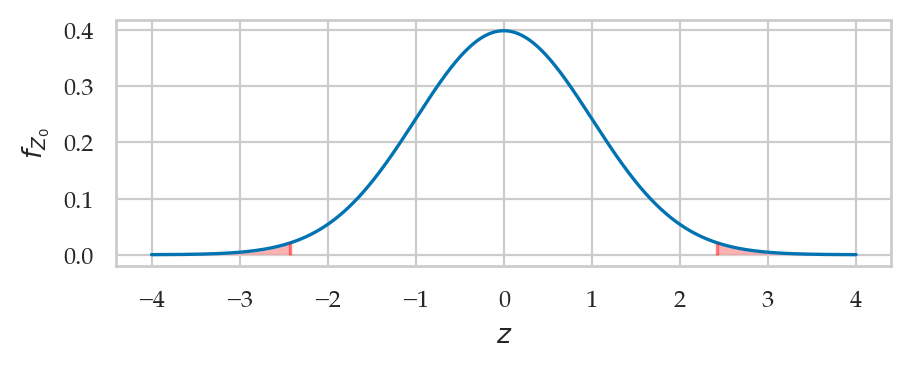

In [24]:
from ministats import calc_prob_and_plot_tails
_, ax = calc_prob_and_plot_tails(rvZ0, -obsz04, obsz04, xlims=[-4,4])
ax.set_title(None)
ax.set_xlabel("$z$")
ax.set_ylabel("$f_{Z_0}$");

#### Alternative calculation without pivotal transformation


Note also the pivotal transformation to the standard $Z$ is not necessary.
We could have obtained the same $p$-value directly from the sampling distribution of the mean,
which is described by a non-standard normal distribution:

$$
  \overline{\mathbf{K}}_0 = \mathcal{N}(\texttt{loc}=\mu_{K_0},\; \texttt{scale}=\stderr{\overline{\mathbf{k}}_{04},0})
$$



In [25]:
from scipy.stats import norm
rvKbar0 = norm(loc=muK0, scale=se04)
#######################################################

In [26]:
dev = abs(obsmean04 - muK0)
dev

3.833499999999958

In [27]:
# left tail            +  right tail 
rvKbar0.cdf(muK0-dev)  +  (1 - rvKbar0.cdf(muK0+dev))

0.015328711497996474

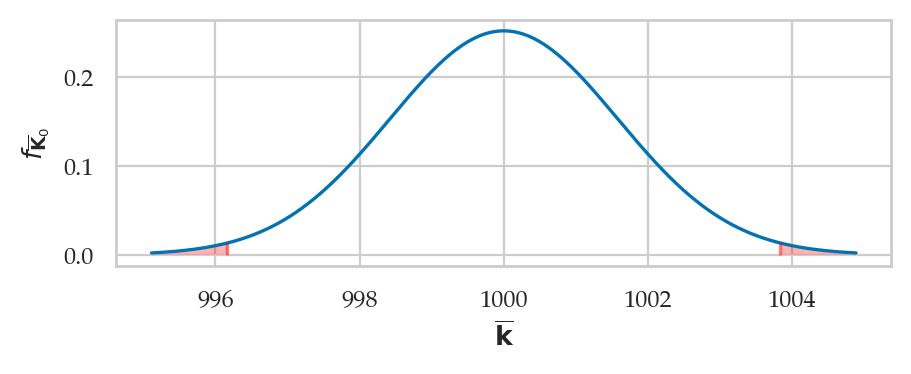

In [28]:
from ministats import calc_prob_and_plot_tails
dev = abs(obsmean04-muK0)
_, ax = calc_prob_and_plot_tails(rvKbar0, muK0-dev, muK0+dev)
ax.set_title(None)
ax.set_xlabel(r"$\overline{\mathbf{k}}$")
ax.set_ylabel(r"$f_{\overline{\mathbf{K}}_0}$");

The $p$-value we obtain is exactly the same.

### Example 2N: test for the mean of Batch 01

In [29]:
kombucha = pd.read_csv("datasets/kombucha.csv")
ksample01 = kombucha[kombucha["batch"]==1]["volume"]
n01 = len(ksample01)
n01

40

In [30]:
# observed mean
obsmean01 = mean(ksample01)
obsmean01

999.10375

In [31]:
# standard error of the mean
se01 = sigmaK0 / np.sqrt(n01)
se01

1.5811388300841895

Note the standard error is the same as `se04` we calculated in Example 1N.
This is because the sample size is the same,
and we're relying on the same assumptions about the standard deviation of the theoretical distribution.

In [32]:
# compute the z statistic 
obsz01 = (obsmean01 - muK0) / se01
obsz01

-0.5668382705851878

In [33]:
from scipy.stats import norm

rvZ0 = norm(loc=0, scale=1)

In [34]:
#          left tail               +  right tail 
pvalue01 = rvZ0.cdf(-abs(obsz01))  +  (1 - rvZ0.cdf(abs(obsz01)))
pvalue01

0.5708240666473916

The $p$-value is large,
so there is no reason to reject $H_0$.
We conclude that Batch 01 must be regular.

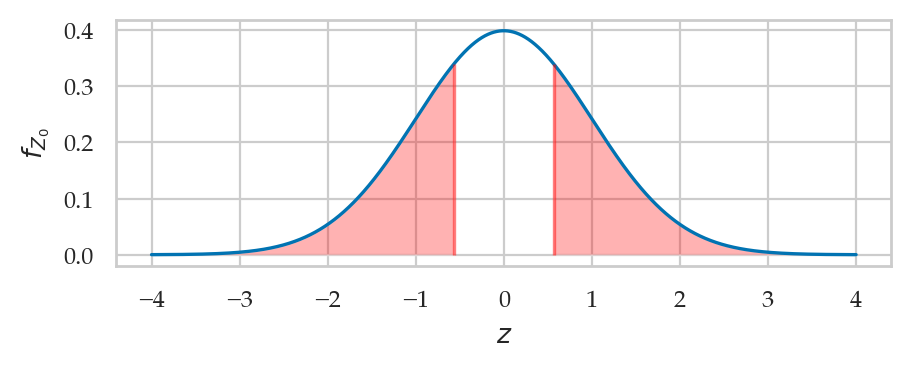

In [35]:
from ministats import calc_prob_and_plot_tails
_, ax= calc_prob_and_plot_tails(rvZ0, obsz01, -obsz01, xlims=[-4,4])
ax.set_title(None)
ax.set_xlabel("$z$")
ax.set_ylabel("$f_{Z_0}$");

## Test for the mean (unknown variance)

### Analytical approximation based on Student's $t$-distribution

Consider again a theoretical distribution $X_0 \sim \mathcal{N}(\mu_{X_0}, \sigma_{X_0})$,
but this time assume that $\sigma_{X_0}$ is not known.

The sampling distribution of the mean $\overline{\mathbf{X}}_0$ for samples of size $n$,
after applying the location-scale transformation,
can be modelled in terms of the standard $t$-distribution with $n-1$ degrees of freedom:

$$
    T_0  = 
    \frac{ \overline{\mathbf{X}}_0-\mu_{X_0} }{ \stderrhat{\overline{\mathbf{x}}} }
    \;\; \sim \;\;  \mathcal{T}(\tt{df}=n-1, \; \tt{loc}=0, \; \tt{scale}=1).
$$


### Example 1T: test for the mean of Batch 04

#### Assume we know mean, but not variance

In [36]:
kombucha = pd.read_csv("datasets/kombucha.csv")
ksample04 = kombucha[kombucha["batch"]==4]["volume"]
n04 = len(ksample04)
n04

40

In [37]:
# estimated standard error of the mean
s04 = std(ksample04)
s04

7.852174139558339

In [38]:
sehat04 = s04 / np.sqrt(n04)
sehat04

1.24153774326386

Recall the value `se04` = $\stderr{\overline{\mathbf{k}}_{04},0}=\frac{\sigma_{K_0}}{\sqrt{40}} = 1.58$,
which we obtained by assuming the population standard deviation is known.
We see that `sehat04` is an underestimate, because the sample standard deviation `s04` happens to be smaller than the true population standard deviation $\sigma_{K_0} = 10$.


In [39]:
# observed sample mean
obsmean04 = mean(ksample04)
obsmean04

1003.8335

In [40]:
# compute the t statistic 
obst04 = (obsmean04 - muK0) / sehat04
obst04

3.0877031494202725

In [41]:
from scipy.stats import t as tdist

df04 = n04 - 1  # n-1 degrees of freedom
rvT04 = tdist(df=df04)

#           left tail          +  right tail 
pvalue04t = rvT04.cdf(-obst04) +  (1-rvT04.cdf(obst04))
pvalue04t

0.0037056653503329305

In [42]:
# no figure because too small

#### Effect size estimates

We can estimate the effect size using the formula $\widehat{\Delta} = \overline{\mathbf{k}}_{04} - \mu_{K_0}$.

In [43]:
obsmean04 - muK0

3.833499999999958

We can also obtain confidence interval for the effect size $\ci{\Delta,0.9}$
by first computing a 90\% confidence interval for the population mean $\ci{\mu,0.9}$,
then subtracting theoretical mean $\mu_{K_0}$.

In [44]:
from ministats import ci_mean
cimu04 = ci_mean(ksample04, alpha=0.1, method="a")
cimu04

[1001.7416639437092, 1005.9253360562907]

In [45]:
[cimu04[0]-muK0, cimu04[1]-muK0]

[1.7416639437092272, 5.925336056290689]

### Example 2T: test for the mean of Batch 01

In [46]:
kombucha = pd.read_csv("datasets/kombucha.csv")
ksample01 = kombucha[kombucha["batch"]==1]["volume"]

In [47]:
# estimated standard error of the mean
s01 = std(ksample01)
n01 = len(ksample01)
sehat01 = s01 / np.sqrt(n01)
sehat01

1.5446402654597249

cf. `se01` = $\stderr{\overline{\mathbf{k}}_{01},0}=\frac{\sigma_{K_0}}{\sqrt{40}} = 1.58$,

In [48]:
# observed sample mean
obsmean01 = mean(ksample01)
obsmean01

999.10375

In [49]:
# compute the t statistic 
obst01 = (obsmean01 - muK0) / sehat01
obst01

-0.5802321874169595

In [50]:
from scipy.stats import t as tdist

df01 = n01 - 1  # n-1 degrees of freedom
rvT01 = tdist(df=df01)

In [51]:
#######################################################
#           left tail          +  right tail 
pvalue01t = rvT01.cdf(-abs(obst01)) + 1-rvT01.cdf(abs(obst01))
pvalue01t

0.5650956637295477

In [52]:
# # ALT. compute right tail and double the value
# p_right = 1 - rvT01.cdf(abs(obst01))
# pvalue01t = 2 * p_right 
# pvalue01t

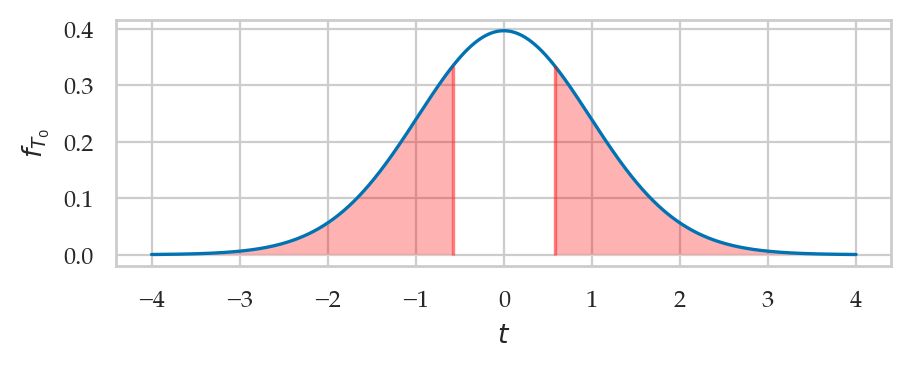

In [53]:
from ministats import calc_prob_and_plot_tails
_, ax = calc_prob_and_plot_tails(rvT01, obst01, -obst01, xlims=[-4,4])
ax.set_title(None)
ax.set_xlabel("$t$")
ax.set_ylabel("$f_{T_0}$");

### Generic function

In [54]:
from ministats import ttest_mean
%psource ttest_mean

def ttest_mean(sample, mu0, alt="two-sided"):
    """
    T-test to detect mean deviation from a population with known mean `mu0`.
    """
    assert alt in ["greater", "less", "two-sided"]
    obsmean = np.mean(sample)
    n = len(sample)
    std = np.std(sample, ddof=1)
    sehat = std / np.sqrt(n)
    obst = (obsmean - mu0) / sehat
    rvT = tdist(df=n-1)
    pvalue = tailprobs(rvT, obst, alt=alt)
    return pvalue


## Test for the variance

### Formula for sampling distribution of the variance

#### Chi-square test for variance

If the theoretical distribution under the null hypothesis is normal
$K_0 \sim \mathcal{N}(\mu_{K_0}, \sigma_{K_0})$,
then the sampling distribution of variance for samples of size $n$
is described by a scaled chi-square distribution:

$$
    S_{\mathbf{K},0}^2
    \;\; \sim \;\;
    \chi^2(\tt{df}\!=\!n-1, \; \tt{scale}\!=\!\tfrac{ \sigma_{K_0}^2 }{ n-1 } )
    \; = \;
    \tfrac{ \sigma_{K_0}^2 }{ n-1 } 
    \cdot \chi^2(n-1).
$$



### Example 3X: test for the variance of Batch 02

In [55]:
kombucha = pd.read_csv("datasets/kombucha.csv")
ksample02 = kombucha[kombucha["batch"]==2]["volume"]
n02 = len(ksample02)
n02

20

In [56]:
obsvar02 = var(ksample02)
obsvar02

124.31760105263139

We can now compute the $q$-statistic,
which is the observed sample variance estimate $s_{\mathbf{k}_{02}}^2 = 124.32$
divided by the scale factor $\tfrac{ \sigma_{K_0}^2 }{ n-1 }$.

In [57]:
obsq02 = (n02-1) * obsvar02 / sigmaK0**2
obsq02

23.620344199999963

In [58]:
from scipy.stats import chi2

rvX2 = chi2(df=n02-1)
pvalue02 = 1 - rvX2.cdf(obsq02)
pvalue02

0.21112073283603838

The $p$-value is large,
so there is no reason to reject $H_0$.

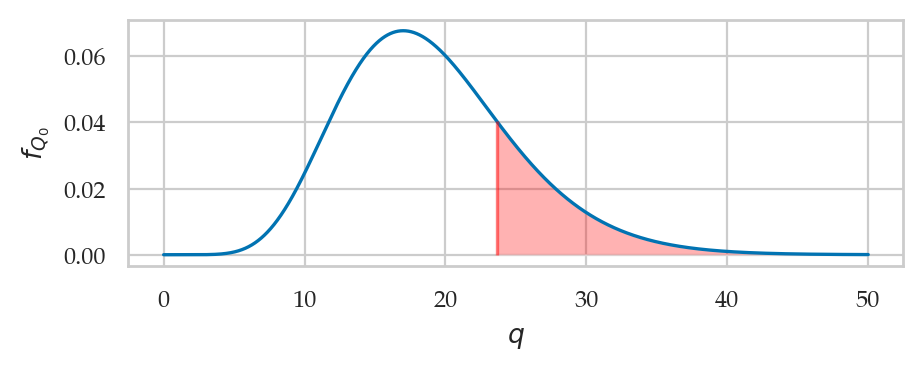

In [59]:
_, ax = calc_prob_and_plot_tails(rvX2, 0, obsq02, xlims=[0,50])
ax.set_title(None)
ax.set_xlabel("$q$")
ax.set_ylabel("$f_{Q_0}$");

### Example 4X: test for the variance of Batch 08

In [60]:
kombucha = pd.read_csv("datasets/kombucha.csv")
ksample08 = kombucha[kombucha["batch"]==8]["volume"]
n08 = len(ksample08)
n08

40

In [61]:
obsvar08 = var(ksample08)
obsvar08

169.9979220512824

In [62]:
obsq08 = (n08-1) * obsvar08 / sigmaK0**2
obsq08

66.29918960000013

In [63]:
from scipy.stats import chi2

rvX2 = chi2(df=n08-1)
pvalue08 = 1 - rvX2.cdf(obsq08)
pvalue08

0.0041211873587608805

The $p$-value is vary small,
so we reject $H_0$.
According to our analysis based on the sample variance from Batch 08,
this batch seems to be irregular: it has an abnormally large variance.

#### Effect size estimates

We can estimate the effect size using the formula $\widehat{\Delta} = s^2_{\mathbf{k}_{08}} / \sigma_{K_0}^2$.

In [64]:
obsvar08 / sigmaK0**2

1.699979220512824

We can also obtain confidence interval for the effect size $\ci{\Delta,0.9}$
by first computing a 90\% confidence interval for the variance $\ci{\sigma^2,0.9}$,
then dividing by the theoretical variance $\sigma_{K_0}^2$.

In [65]:
from ministats import ci_var
civar08 = ci_var(ksample08, alpha=0.1, method="a")
ci_l = civar08[0] / sigmaK0**2
ci_u = civar08[1] / sigmaK0**2
[ci_l, ci_u]

[1.2148888239061653, 2.58019779302895]

Compare this to the bootstrap confidence interval for the effect size $\ci{\Delta,0.9}^* = [1.17, 2.18]$ ,
which we obtained earlier in [Section 3.3](./33_intro_to_NHST.ipynb).

## Alternative calculation methods

### Using `scipy.stats.ttest_1samp` for one-sample $t$-test

In [66]:
# ALT. using existing function `scipy.stats`
from scipy.stats import ttest_1samp
res = ttest_1samp(ksample04, popmean=muK0)
res.pvalue

0.0037056653503329626

In [67]:
cimu04 = res.confidence_interval(confidence_level=0.9)
[cimu04.low - muK0, cimu04.high - muK0]

[1.7416639437092272, 5.925336056290689]

We see the $p$-value and the 90\% confidence interval are same the ones we calculated earlier in Example 1T.

### Bootstrap estimate of the standard error

Another way to obtain the standard error of the mean
(the standard deviation of the sampling distribution of the mean)
is to use the bootstrap estimate.

See problems PNN and PMM in the notebook [chapter3_problems.ipynb](../problems/chapter3_problems.ipynb).


## Explanations

#### Helper function for calculating $p$-values

In [68]:
def tailprobs(rvH0, obs, alt="two-sided"):
    """
    Calculate the probability of all outcomes of the random variable `rvH0`
    that are equal or more extreme than the observed value `obs`.
    """
    assert alt in ["greater", "less", "two-sided"]
    if alt == "greater":
        pvalue = 1 - rvH0.cdf(obs)
    elif alt == "less":
        pvalue = rvH0.cdf(obs)
    elif alt == "two-sided":  # assumes distribution is symmetric
        meanH0 = rvH0.mean()
        obsdev = abs(obs - meanH0)
        pleft = rvH0.cdf(meanH0 - obsdev)
        pright = 1 - rvH0.cdf(meanH0 + obsdev)
        pvalue = pleft + pright
    return pvalue

#### One-sided $p$-value calculation example

Reusing the variables `n02=20` and `obsq02=23.62` we calculated in Example 3X above,
we can calculate the $p$-value by calling the helper function `tailprobs`
with the option `alt="greater"`:

In [69]:
rvX2 = chi2(df=n02-1)
tailprobs(rvX2, obsq02, alt="greater")

0.21112073283603838

The value we obtained is identical to the value `pvalue02` we obtained in Example 3X,
so we know the function `tailprobs` works as expected for $p$-value calculations of type (a),
where we want to detect only positive deviations from the expected distribution under $H_0$.

#### Two-sided $p$-value calculation example

Reusing the variable `obsz04` we calculated in Example 1N above,
we can calculate the $p$-value by calling the function `tailprobs`
with the option `alt="two-sided"`:

In [70]:
rvZ0 = norm(loc=0, scale=1)
tailprobs(rvZ0, obsz04, alt="two-sided")

0.015328711497996474

The value we obtained is identical to the value `pvalue04` we obtained in Example 1N,
so we know the function `tailprobs` works as expected for $p$-value calculations of type (c),
where we want to detect both positive and negative deviations from the expected distribution under $H_0$.

## Discussion

### Statistical modelling and assumptions

## Exercises

#### Exercise NN: use integration to obtain of the probability ...

In [71]:
from scipy.integrate import quad
fZ0 = rvZ0.pdf
oo = np.inf
# left tail                 +  right tail
quad(fZ0, -oo, -obsz04)[0]  +  quad(fZ0, obsz04, oo)[0]

0.015328711497995967

## Links